# Summary
This Script pulls data from the pilot

In [1]:
# load libraries and initialize database cursor
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = pymysql.connect(
    host="thirdtest.camwsondhmqr.us-east-2.rds.amazonaws.com",
    user="thirdtest",
    passwd="Qja1998+0325",
    db="ebdb"
)
cursor = conn.cursor()

In [2]:
# pull data from database and print user data
cursor.execute('SELECT * FROM user');
rows = cursor.fetchall()

df_users = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_users.rename(
    columns={0:'Name', 1:'Political Stance', 2:'Session', 3:'Question Order', 4:'Current Question', 5:'World'},
    inplace=True
)
#df_users = df_users.sort_values(['Name'], ascending=[1])
df_users['Turn'] = range(1,len(df_users)+1)
df_users = df_users[['Turn','Name','Political Stance','Session', 'Question Order', 'World']]
df_users

,Turn,Name,Political Stance,Session,Question Order,World
0,1,A1DNJ17PE2RYJZ,strong Democrats,5b9e8ead86765,"23,24,18,15,9,19,21,11,10,14,8,13,17,2,5,16,22...",2
1,2,A32E28U1ZP67NE,Republicans,5b9e9244aa06c,"23,24,18,4,20,7,21,19,14,11,13,5,16,15,1,9,22,...",2
2,3,A2R8IV2PWFTY00,strong Republicans,5b9e97d2eaef8,"23,24,10,11,4,6,21,15,12,2,20,1,16,9,19,7,22,1...",2
3,4,A55CXM7QR7R0N,Republicans,5b9e9d7db7b35,"23,24,9,10,8,5,21,4,15,7,20,6,1,2,12,14,22,17,...",2
4,5,A28X02I7Q5J48B,Republicans,5b9ea66645e3c,"23,24,19,13,7,10,21,15,9,17,20,4,6,16,12,11,22...",2
5,6,A1PUHCEBSOWETV,strong Democrats,5b9eabfd82de5,"23,24,6,1,16,12,21,18,10,3,14,8,4,2,7,9,22,13,...",2
6,7,A248LF7KKHXZ14,strong Democrats,5b9eb3a5cf9b7,"23,24,12,4,9,14,21,13,5,10,17,16,19,20,11,1,22...",2
7,8,A2XHD64QUKA5Z6,strong Democrats,5b9ec5b7d2c5e,"23,24,19,6,4,16,21,8,1,20,18,10,17,7,12,11,22,...",2
8,9,A98E8M4QLI9RS,strong Democrats,5b9ec94c1fac2,"23,24,4,9,15,6,21,5,13,14,3,18,7,20,16,19,22,1...",2
9,10,A2LHA9ZHYTGWAE,strong Democrats,5b9ecd2791de6,"23,24,9,2,1,14,21,13,3,18,16,8,4,15,19,12,22,5...",2


In [3]:
# make user-question data in long format
cursor.execute('SELECT * FROM user_question_world_answer WHERE world_id != 1');
rows = cursor.fetchall()

df_responses = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_responses.rename(
    columns={0:'Name', 1:'World', 2:'Question', 3:'Response'},
    inplace=True
)

# Construct and print fully wide one-hot-coded dataframe
df_responses_full = df_responses
df_responses_full = pd.merge(df_responses_full, df_users)

df_responses_full = df_responses_full.drop(["Question Order", "Session"], axis=1)
df_responses_full = df_responses_full.rename(columns={
    "Political Stance":"Political Stance Full",
    4:"Party Predict",
    5:"See Priors"})

df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Full"]
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Democrats", "Democrats")
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Republicans", "Republicans")

df_responses_full["Response"] = df_responses_full["Response"].replace("support", 1)
df_responses_full["Response"] = df_responses_full["Response"].replace("oppose", 0)

df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Democrats", 1)
df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Republicans", 0)

print('Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes')
df_responses_full

Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes


,Name,World,Question,Response,Party Predict,See Priors,6,Turn,Political Stance Full,Political Stance Binary
0,A1DNJ17PE2RYJZ,2,23,0.0,0,1,None,1,strong Democrats,Democrats
1,A1DNJ17PE2RYJZ,2,24,1.0,1,1,None,1,strong Democrats,Democrats
2,A1DNJ17PE2RYJZ,2,18,0.0,0,0,None,1,strong Democrats,Democrats
3,A1DNJ17PE2RYJZ,2,15,1.0,1,1,None,1,strong Democrats,Democrats
4,A1DNJ17PE2RYJZ,2,9,1.0,1,1,None,1,strong Democrats,Democrats
5,A1DNJ17PE2RYJZ,2,19,1.0,0,1,None,1,strong Democrats,Democrats
6,A1DNJ17PE2RYJZ,2,21,0.0,0,1,None,1,strong Democrats,Democrats
7,A1DNJ17PE2RYJZ,2,11,0.0,1,1,None,1,strong Democrats,Democrats
8,A1DNJ17PE2RYJZ,2,10,1.0,0,1,None,1,strong Democrats,Democrats
9,A1DNJ17PE2RYJZ,2,14,0.0,1,1,None,1,strong Democrats,Democrats


## Bug Checks

In [4]:
# bug check: how many "ghost" pages
print('# "ghost" pages:', len(df_responses[df_responses['Name'] == '']))
df_responses[df_responses['Name'] == '']

# "ghost" pages: 0


,Name,World,Question,Response,4,5,6


## Manipulation Checks

In [5]:
# manipulation check: who didn't want to see others' responses
print('# "do not see prior responses" selections:', len(df_responses[df_responses[5] == '0']))
df_responses[df_responses[5] == '0']

# "do not see prior responses" selections: 2


,Name,World,Question,Response,4,5,6
2,A1DNJ17PE2RYJZ,2,18,oppose,Republicans,0,None
25,A32E28U1ZP67NE,2,18,oppose,Republicans,0,None


## Polarization

Responses by Question by Group:
                                   Response
Question Political Stance Binary          
1        Democrats                0.272727
         Republicans              0.100000
2        Democrats                0.333333
         Republicans              0.300000
3        Democrats                0.555556
         Republicans              0.222222
4        Democrats                0.300000
         Republicans              0.800000
5        Democrats                0.400000
         Republicans              0.800000
6        Democrats                0.125000
         Republicans              0.800000
7        Democrats                0.000000
         Republicans              0.600000
8        Democrats                0.700000
         Republicans              0.142857
9        Democrats                0.900000
         Republicans              0.363636
10       Democrats                0.636364
         Republicans              0.363636
11       Democrats   

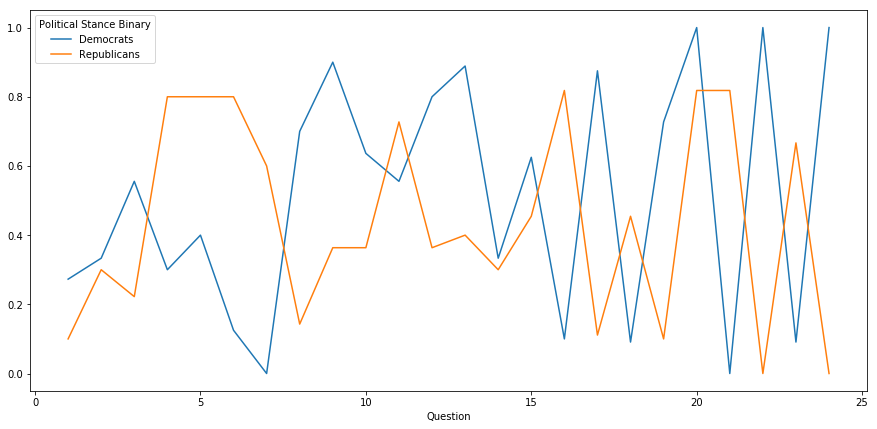

In [6]:
# Construct fully wide dataframe with binarized political stance variable
df_pol = df_responses_full.groupby(['Question', 'Political Stance Binary']).mean()
df_pol = df_pol.drop(["World","Turn"], axis=1)

df_pol_response = df_pol.drop(["Party Predict"], axis=1)
print("Responses by Question by Group:\n", df_pol_response,'\n\n')

df_pol_partypredict = df_pol.drop(["Response"], axis=1)
print("Patry Predictions by Question by Group:\n", df_pol_partypredict, '\n\n')


fig, ax = plt.subplots(figsize=(15,7))
df_pol.groupby(['Question','Political Stance Binary']).mean()['Response'].unstack().plot(ax=ax)

## Data carpentry

In [32]:
# print user-question data in wide format
#df_responses = df_responses.sort_values(['Name'], ascending=[1])
df_responses_full2 = df_responses_full.pivot(index='Name', columns='Question', values='Response')
df_users2 = df_users.set_index('Name').join(df_responses_full2).sort_values('Turn')
df_users2

,Turn,Political Stance,Session,Question Order,World,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,24
Name,,,,,,,,,,,,,,,,,,,,,
A19L8SNH73AX1Z,1,Republicans,5b8b4044824d7,"23,24,14,6,2,18,21,13,12,8,3,5,20,15,7,4,22,1,...",2,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
AEO8NL8D28NQG,2,strong Democrats,5b8b4d86a9b32,"23,24,2,4,18,7,21,10,8,9,3,14,17,6,12,11,22,19...",2,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
A3302168IZJTMX,3,Democrats,5b8b568322aea,"23,24,3,7,20,9,21,17,6,16,12,10,1,8,19,4,22,5,...",2,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
A2A14Q1JLWW6R1,4,strong Democrats,5b8b7fcb9fc24,"23,24,20,17,10,12,21,5,9,14,6,15,13,8,16,3,22,...",2,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A10G0V9R0U5OR,5,Democrats,5b8b863661d5f,"23,24,2,18,12,20,21,7,3,19,8,15,6,13,14,5,22,9...",2,0.0,1.0,0.0,0.0,1.0,...,1.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
A1DNJ17PE2RYJZ,6,strong Democrats,5b8e7e835809d,"23,24,7,5,11,18,21,9,1,6,20,10,14,2,16,15,22,3...",2,0.0,1.0,1.0,NaN,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A2EZNZ6X58RTNR,7,strong Republicans,5b8ea5bc5b8b2,"23,24,4,7,19,12,21,5,13,14,18,17,9,1,11,3,22,2...",2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2EKR2ZFO10VMV,8,strong Democrats,5b8eb41f294fa,"23,24,12,8,3,17,21,6,16,7,10,11,18,2,9,1,22,20...",2,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
A1CA46R2A6TV9W,9,Democrats,5b8eb7d8c8f49,"23,24,12,3,17,15,21,2,20,18,13,16,10,19,8,4,22...",2,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## Write out and save data

In [33]:
# write out and save user-question data to .csv
df_users2.to_csv('pilot_data.csv')